<a href="https://colab.research.google.com/github/PrzemyslawTrabuc/GoogleColab-files/blob/main/IO_LAB_DECISION_TREE_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

             Opracowano na podstawie:
https://github.com/rhiever/Data-Analysis-and-Machine-Learning-Projects/blob/master/example-data-science-notebook/Example%20Machine%20Learning%20Notebook.ipynb

Notebook by Randal S. Olson
Supported by Jason H. Moore
University of Pennsylvania Institute for Bioinformatics

[Licencja](https://github.com/rhiever/Data-Analysis-and-Machine-Learning-Projects#license)

#**Analiza problemu**

Na potrzeby tego ćwiczenia załóżmy, że pracujemy dla startupu, któremu właśnie sfinansowano stworzenie aplikacji na smartfony, która automatycznie identyfikuje gatunki kwiatów na podstawie zdjęć zrobionych smartfonem. Pracujemy z zespołem naukowców zajmujących się danymi o średniej wielkości i będziemy tworzyć część potoku analizy danych dla tej aplikacji.

Szef działu danych naszej firmy zlecił nam stworzenie demonstracyjnego modelu uczenia maszynowego, który pobiera cztery pomiary z kwiatów (długość działki kielicha, szerokość działki kielicha, długość i szerokość płatka - sepal length, sepal width, petal length, petal width) i identyfikuje gatunki na podstawie samych tych pomiarów.

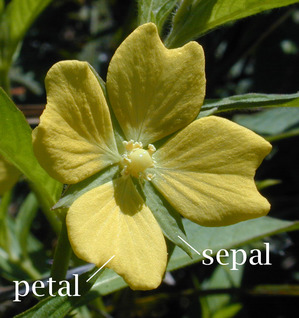


Iris setosa
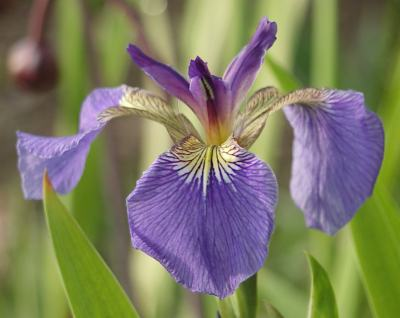

Iris versicolor
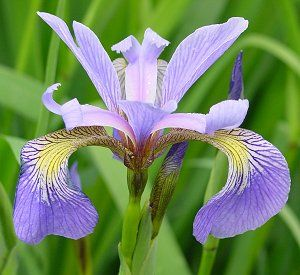

Iris virginica
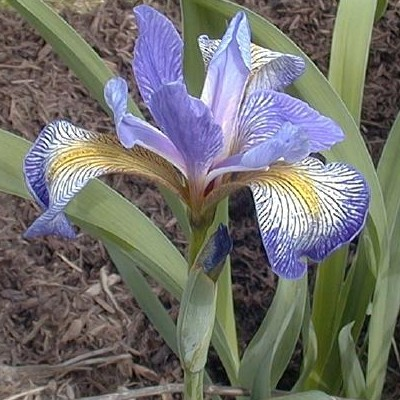

#**Krok 1: Podstawowe pytania - "Look at the Big Picture"**


Pierwszym krokiem do każdego projektu analizy danych jest zdefiniowanie pytania lub problemu, który chcemy rozwiązać, oraz zdefiniowanie miary (lub zestawu miar), które pozwolą nam odnieść sukces w rozwiązaniu tego zadania. Lista kontrolna analizy danych pozwala nam odpowiedzieć na kilka pytań, aby to osiągnąć, więc przeanalizujmy te pytania.

    Czy określiłeś rodzaj pytania analitycznego (np. eksploracja, związek przyczynowy) przed rozpoczęciem pracy z danymi?

Próbujemy sklasyfikować gatunek (tj. klasę) kwiatu na podstawie czterech pomiarów, które otrzymaliśmy: długość działki kilicha, szerokość działki kilicha, długość i szerokość płatka.

    Czy zdefiniowałeś miernik sukcesu (cel) przed rozpoczęciem? 

Zróbmy to teraz. Ponieważ dokonujemy klasyfikacji, możemy użyć dokładności (accuracy) - ułamka prawidłowo sklasyfikowanych kwiatów - do ilościowego określenia, jak dobrze działa nasz model. Szef działu danych naszej firmy powiedział nam, że powinniśmy osiągnąć co najmniej 90% dokładności (ACC>=90%).

    Czy zrozumiałeś kontekst pytania oraz naukową lub biznesowe zastosowanie?

Tworzymy część procesu analizy danych dla aplikacji na smartfony, która będzie mogła klasyfikować gatunki kwiatów na podstawie zdjęć zrobionych smartfonem. W przyszłości ten proces przetwarzania potokowego(pipeline) zostanie podłączony do innego, ogólniejszego procesu, który automatycznie mierzy na podstawie zdjęć cechy, których używamy do przeprowadzania tej klasyfikacji.

    Czy wykonałeś projekt eksperymentalny?

Szef działu danych naszej firmy powiedział nam, że badacze terenowi mierzą ręcznie 50 losowo pobranych kwiatów każdego gatunku przy użyciu standardowej metodologii. Badacze terenowi wykonują zdjęcia każdego kwiatu, który pobierają, pod wcześniej określonymi kątami, aby późniejsze wyniki pomiarów i gatunków mogły zostać potwierdzone przez innych badaczy. Na koniec każdego dnia dane są kompilowane i przechowywane w prywatnym repozytorium firmy.

    Czy zastanawiałeś się, czy na pytanie można odpowiedzieć, korzystając z dostępnych danych?

Obecnie mamy zbiór danych tylko dla trzech rodzajów kwiatów Iris. Model zbudowany na podstawie tego zestawu danych będzie działał tylko dla tych kwiatów Iris, więc będziemy potrzebować więcej danych, aby utworzyć ogólny klasyfikator kwiatów.

Zwróć uwagę, że spędziliśmy dużo czasu pracując nad tym problemem bez pisania linii kodu lub nawet przeglądania danych.

Przemyślenie i udokumentowanie problemu, nad którym pracujemy, jest ważnym krokiem do przeprowadzenia skutecznej analizy danych, która często jest pomijana. **Nie pomijaj tego.**

#**Krok 2: Pozyskanie danych**

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving iris-data.csv to iris-data.csv


#**Krok 3: Eksploruj i zwizualizuj dane - Sprawdzanie danych**

Następnym krokiem jest przyjrzenie się danym, z którymi pracujemy. Nawet wyselekcjonowane zbiory danych od rządu mogą zawierać błędy i ważne jest, abyśmy je wykryli, zanim poświęcimy zbyt dużo czasu na naszą analizę.

Ogólnie staramy się odpowiedzieć na następujące pytania:

     Czy jest coś nie tak z danymi?
     Czy są jakieś nietypowe elementy w danych?
     Czy muszę poprawić lub usunąć jakiekolwiek dane?



In [ ]:


iris_data = pd.read_csv('iris-data.csv')
iris_data.head()
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(iris_data)

     sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm  \
0              5.100             3.5              1.4             0.2   
1              4.900             3.0              1.4             0.2   
2              4.700             3.2              1.3             0.2   
3              4.600             3.1              1.5             0.2   
4              5.000             3.6              1.4             0.2   
5              5.400             3.9              1.7             0.4   
6              4.600             3.4              1.4             0.3   
7              5.000             3.4              1.5             NaN   
8              4.400             2.9              1.4             NaN   
9              4.900             3.1              1.5             NaN   
10             5.400             3.7              1.5             NaN   
11             4.800             3.4              1.6             NaN   
12             4.800             3.0              1

Wydaje się, że dane są w użytecznym formacie.

Pierwszy wiersz w pliku danych definiuje nagłówki kolumn, a nagłówki są wystarczająco opisowe, abyśmy mogli zrozumieć, co reprezentuje każda kolumna. Nagłówki podają nam nawet jednostki, w których zarejestrowano pomiary, na wypadek gdybyśmy musieli to wiedzieć w późniejszym etapie projektu.

Każdy wiersz następujący po pierwszym wierszu reprezentuje wpis dotyczący kwiatu: cztery wymiary i jedną klasę, która informuje nas o gatunku kwiatu.

Jedną z pierwszych rzeczy, na które powinniśmy zwrócić uwagę, są brakujące dane. Na szczęście badacze terenowi powiedzieli nam już, że wstawili „NA” do arkusza kalkulacyjnego, gdy brakowało im pomiaru.

In [ ]:
iris_data = pd.read_csv('iris-data.csv', na_values=['NA'])
iris_data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Następnie zawsze dobrze jest przyjrzeć się rozkładowi naszych danych - zwłaszcza wartości odstających (outliers).

Tabele rzadko są przydatne, chyba że wiemy, że nasze dane powinny mieścić się w określonym zakresie. Zwykle lepiej jest wizualizować dane w jakiś sposób. Wizualizacja sprawia, że wartości odstające i błędy natychmiast się wyróżniają, podczas gdy mogą pozostać niezauważone w dużej tabeli liczb.

Utwórzmy macierz rozporoszenia (scatterplot matrix)prezentującą w jednym miejscu związki pomiedzy parami poszczególnych cech datasetu. Macierz rozproszenia przedstawia rozkład każdej kolumny (cechy) wzdłuż przekątnej (histogramy), a następnie serii wykresów rozrzutu (pairplot) dla kombinacji par poszczególnych zmiennych. 

Stanowi ona skuteczne narzędzie do wyszukiwania błędów w naszych danych.

Dzieki macierzy rozproszenia możemy szybko oszacować rozkład danyhc oraz obecność próbek odstających. Mozna takze zauwazyć niektóre rodzaje związków pomiędzy zmiennymi.

Możemy nawet ustawić w pakiecie kreślenia kolorowanie każdego wpisu według jego klasy, aby szukać trendów w klasach.


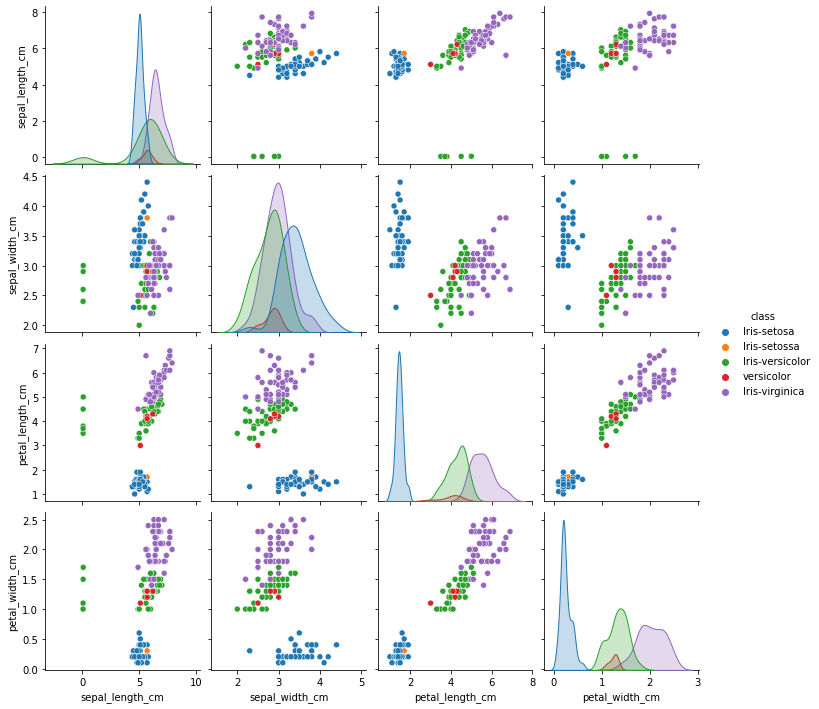

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

# We have to temporarily drop the rows with 'NA' values
# because the Seaborn plotting function does not know
# what to do with them
sb.pairplot(iris_data.dropna(), hue='class');

Z macierzy rozporoszenia widać już pewne problemy ze zbiorem danych:



1.   Istnieje pięć klas, w których powinny być tylko trzy, co oznacza, że wystąpiły błędy w kodowaniu.
2.        W pomiarach istnieją wyraźne wartości odstające, które mogą być błędne: 


> - jeden wpis sepal_width_cm dotyczący Iris-setosa wykracza daleko poza normalny zakres
> - kilka wpisów sepal_length_cm dla Iris-versicolor jest z jakiegoś powodu bliskiego zeru.


3. Musieliśmy usunąć te wiersze z brakującymi wartościami.



We wszystkich tych przypadkach musimy podjąć decyzję, co zrobić z błędnymi danymi.

#**Krok 4: Wstępne przetworzenie danych w celu uruchomienia - porządkowanie, czyszczenie danych**

Eliminujemy kolejno błędy:

Przeanalizujmy kolejno problemy:

     Istnieje pięć klas, w których powinny być tylko trzy, co oznacza, że wystąpiły błędy w kodowaniu.

Po rozmowie z badaczami terenowymi wygląda na to, że jeden z nich zapomniał dodać Iris - przed wpisaniem Iris-versicolor. Druga obca klasa, Iris-setossa, była po prostu literówką, której zapomnieli naprawić.

In [ ]:
iris_data.loc[iris_data['class'] == 'versicolor', 'class'] = 'Iris-versicolor'
iris_data.loc[iris_data['class'] == 'Iris-setossa', 'class'] = 'Iris-setosa'

iris_data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Kolejny problem:

    W pomiarach istnieją wyraźne wartości odstające, które mogą być błędne:
    -jeden wpis sepal_width_cm dotyczący Iris-setosa wykracza daleko poza normalny zakres
    -kilka wpisów sepal_length_cm dla Iris-versicolor jest z jakiegoś powodu bliskich zeru.

Naprawianie wartości odstających może być trudnym zadaniem. Rzadko jest wiadomo, czy wartość odstająca została spowodowana błędem pomiaru, zapisaniem danych w niewłaściwych jednostkach, czy też wartość odstająca jest prawdziwą anomalią. Z tego powodu powinniśmy zachować ostrożność podczas pracy z wartościami odstającymi: jeśli zdecydujemy się wykluczyć jakiekolwiek dane, musimy udokumentować, jakie dane wykluczyliśmy, i podać solidne uzasadnienie dla wykluczenia tych danych. (tzn. „Te dane nie pasują do mojej hipotezy” nie będą znosić wzajemnej weryfikacji).

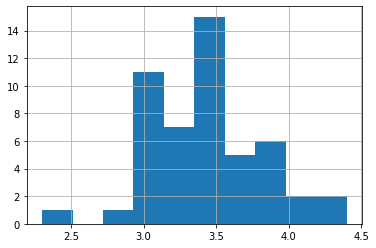

In [ ]:
#Histogram before
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'sepal_width_cm'].hist()

W przypadku jedynego anomalnego wpisu dla klasy Iris setosa, powiedzmy, że nasi badacze wiedzą, że niemożliwe jest, aby tęczówka setosa miała szerokość działkową poniżej 2,5 cm. Najwyraźniej ten wpis został popełniony przez pomyłkę i lepiej jest po prostu go wyrzucić, niż spędzać godziny na sprawdzaniu, co się stało.

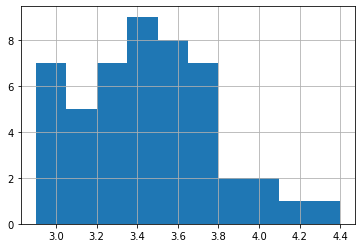

In [ ]:
# This line drops any 'Iris-setosa' rows with a separal width less than 2.5 cm
iris_data = iris_data.loc[(iris_data['class'] != 'Iris-setosa') | (iris_data['sepal_width_cm'] >= 2.5)]

#Histogram after
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'sepal_width_cm'].hist()

Następnym problemem jest kilka wartości bliskich zeru (Iris-versicolor). Spójrzmy na te wiersze.

In [ ]:
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') &
              (iris_data['sepal_length_cm'] < 1.0)]



,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


Wszystkie te prawie zerowe wpisy sepal_length_cm wydają się różnić o dwa rzędy wielkości, tak jakby zostały zapisane w metrach zamiast w centymetrach.

Po krótkiej korespondencji z badaczami terenowymi okazuje się, że jeden z nich zapomniał przeliczyć te pomiary na centymetry. Zmieńmy to.

''

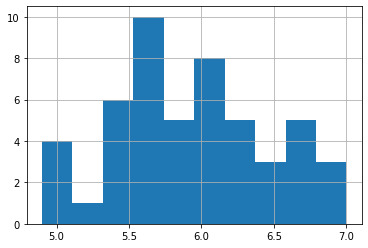

In [ ]:
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') &
              (iris_data['sepal_length_cm'] < 1.0),
              'sepal_length_cm'] *= 100.0

iris_data.loc[iris_data['class'] == 'Iris-versicolor', 'sepal_length_cm'].hist()
;

I ostatni problem:

     Musieliśmy usunąć te wiersze z brakującymi wartościami.

Przyjrzyjmy się wierszom z brakującymi wartościami:

In [ ]:
iris_data.loc[(iris_data['sepal_length_cm'].isnull()) |
              (iris_data['sepal_width_cm'].isnull()) |
              (iris_data['petal_length_cm'].isnull()) |
              (iris_data['petal_width_cm'].isnull())]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


Usunięcie tych wierszy to niezbyt dobre rozwiązanie - zwłaszcza biorąc pod uwagę, że są to wszystkie wpisy Iris-setosa. 

Ponieważ wydaje się, że brakujące dane są systematyczne - wszystkie brakujące wartości znajdują się w tej samej kolumnie dla tego samego gatunku irysa - ten błąd może potencjalnie wpłynąć na naszą analizę.

Jednym ze sposobów radzenia sobie z brakującymi danymi jest wprowadzenie w brakujące miejsca średniej, tzn. jeśli wiemy, że wartości pomiaru mieszczą się w pewnym zakresie, możemy wypełnić puste wartości średnią z tego pomiaru.

Zobaczmy, czy możemy to zrobić w tym przypadku.

''

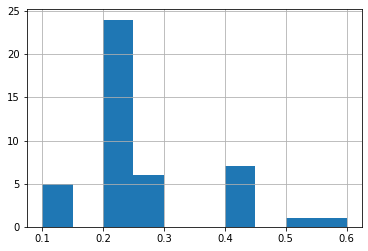

In [ ]:
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'petal_width_cm'].hist()
;

Większość szerokości płatków Iris-setosa mieści się w zakresie 0,2-0,3, więc wypełnijmy te wpisy średnią zmierzoną szerokością płatków.

In [ ]:
average_petal_width = iris_data.loc[iris_data['class'] == 'Iris-setosa', 'petal_width_cm'].mean()

iris_data.loc[(iris_data['class'] == 'Iris-setosa') &
              (iris_data['petal_width_cm'].isnull()),
              'petal_width_cm'] = average_petal_width

iris_data.loc[(iris_data['class'] == 'Iris-setosa') &
              (iris_data['petal_width_cm'] == average_petal_width)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,0.25,Iris-setosa
8,4.4,2.9,1.4,0.25,Iris-setosa
9,4.9,3.1,1.5,0.25,Iris-setosa
10,5.4,3.7,1.5,0.25,Iris-setosa
11,4.8,3.4,1.6,0.25,Iris-setosa


Sprawdżmy czy pozostały jakieś brakujące wpisy:

In [ ]:
iris_data.loc[(iris_data['sepal_length_cm'].isnull()) |
              (iris_data['sepal_width_cm'].isnull()) |
              (iris_data['petal_length_cm'].isnull()) |
              (iris_data['petal_width_cm'].isnull())]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class


Nie mamy już brakujących danych w naszym zestawie danych.

Uwaga: jeśli czujemy że uśrednianie nie jest dobrym rozwiązaniem, możemy usunąć wszystkie wiersze z brakującymi danymi za pomocą wywołania dropna ():

iris_data.dropna (inplace = True)

Po całej tej złozonej pracy nie chcemy powtarzać tego procesu za każdym razem, gdy pracujemy ze zbiorem danych. Zapiszmy uporządkowany plik danych jako nowy zbiór i od teraz pracujmy bezpośrednio z tym datasetem.

In [ ]:
iris_data.to_csv('iris-data-clean.csv', index=False)
iris_data_clean = pd.read_csv('iris-data-clean.csv')

Teraz spójrzmy na macierz rozproszenia po uporządkowaniu danych:

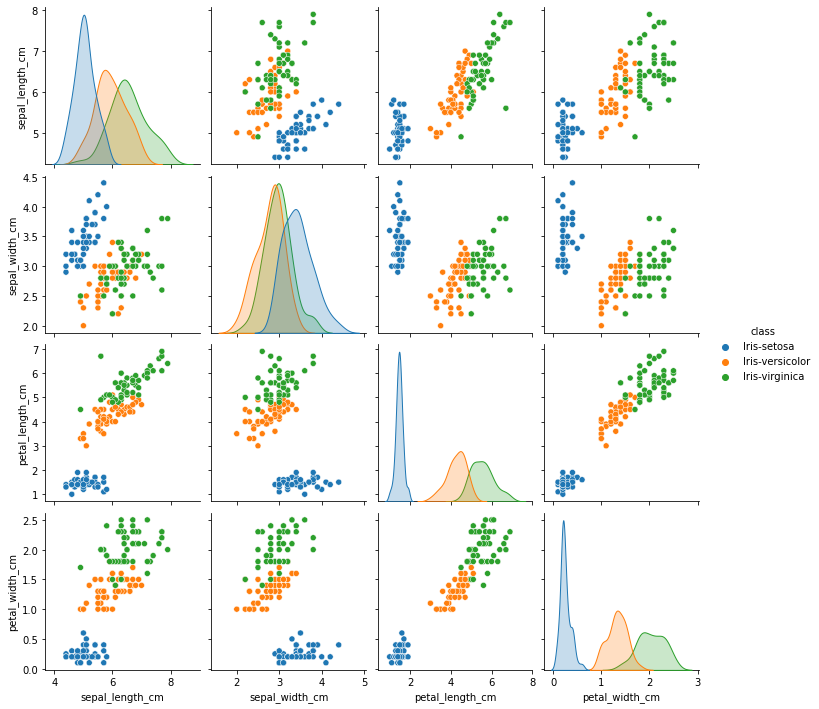

In [ ]:
sb.pairplot(iris_data_clean, hue='class')


Celowo wstawiono wiele błędów do tego zestawu danych, aby zademonstrować niektóre z wielu możliwych scenariuszy, z którymi możesz się spotkać podczas porządkowania danych.

Ogólne wnioski powinny być następujące:

     Upewnij się, że Twoje dane są poprawnie zakodowane

     Upewnij się, że dane mieszczą się w oczekiwanym zakresie, i jeśli to możliwe, korzystaj z wiedzy dziedzinowej, aby zdefiniować ten oczekiwany zakres

     Postępuj z brakującymi danymi w taki czy inny sposób: zastąp je, jeśli możesz, lub usuń

     Nigdy nie porządkuj danych ręcznie, ponieważ nie jest to łatwe do odtworzenia

     Użyj kodu jako zapisu tego, jak uporządkowałeś swoje dane

     Przedstaw na wykresach wszystko, co możesz na temat danych na tym etapie analizy, aby wizualnie potwierdzić, że wszystko wygląda poprawnie

In [ ]:
#Import iris-data-clean.csv
import pandas as pd
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: ignored

In [ ]:
#Rozpoczęcie pracy z nowym plikiem danych --> iris-data-clean.csv
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

iris_data_clean = pd.read_csv('iris-data-clean.csv')


#**Krok 5: Analiza eksploracyjna EDA**

Teraz, gdy spędziliśmy zbyt dużo czasu na porządkowaniu danych, możemy zacząć je analizować!

Analiza eksploracyjna to krok, na którym zaczynamy zagłębiać się w zbiór danych, wykraczając poza wartości odstające i błędy. Będziemy starać się odpowiedzieć na takie pytania, jak:

     Jaki jest rozkład danych?

     Czy są jakieś korelacje w danych?

     Czy są jakieś zakłócające czynniki, które wyjaśniają te korelacje?

Na tym etapie wykreślamy wszystkie dane na tak wiele sposobów, jak to tylko możliwe. Twórz wiele wykresów, ale nie przejmuj się, aby były ładne - te wykresy są przeznaczone do użytku wewnętrznego.

Wróćmy do macierzy rozproszenia, której używaliśmy wcześniej.

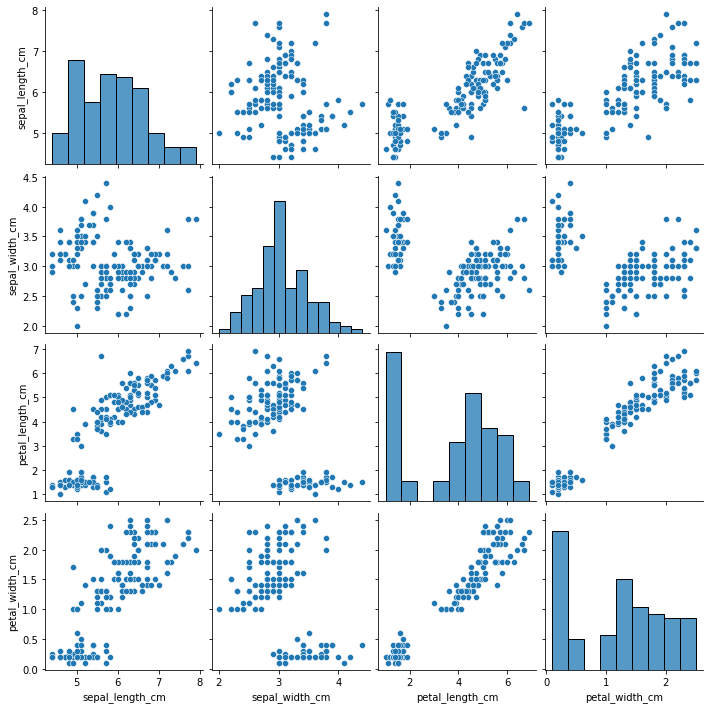

In [ ]:
sb.pairplot(iris_data_clean)

Dane maja w większości rozkład normalny, co jest dobrą wiadomością, jeśli planujemy zastosować jakiekolwiek metody modelowania, które zakładają, że dane mają taki rozkład.

Coś dziwnego dzieje się z pomiarami płatków (petal). Może ma to coś wspólnego z różnymi typami irysów. Ponownie oznaczmy kolorami dane według klasy, aby zobaczyć, czy to wyjaśnia sprawę.

In [ ]:
sb.pairplot(iris_data_clean, hue='class')


Rzeczywiście, dziwny rozkład pomiarów płatków istnieje z powodu różnych gatunków. To dobra wiadomość dla naszego zadania klasyfikacyjnego, ponieważ oznacza to, że pomiary płatków ułatwiają rozróżnienie między Iris-setosa a innymi typami Iris.

Rozróżnienie Iris-versicolor i Iris-virginica będzie trudniejsze, biorąc pod uwagę, jak bardzo ich pomiary się pokrywają.

Istnieją również korelacje między długością i szerokością płatka, a także długością i szerokością działki. Biolodzy polowi zapewniają nas, że można się tego spodziewać: dłuższe płatki kwiatów również są szersze i to samo dotyczy działek.

Możemy również wykonać wykresy skrzypcowe danych, aby porównać rozkłady pomiarów klas. Wykresy skrzypcowe zawierają te same informacje, co wykresy typy box plot, ale także skalowane są zgodnie z gęstością danych.

In [ ]:
plt.figure(figsize=(10, 10))

for column_index, column in enumerate(iris_data_clean.columns):
    if column == 'class':
        continue
    plt.subplot(2, 2, column_index + 1)
    sb.violinplot(x='class', y=column, data=iris_data_clean)

#**Krok 6: Klasyfikacja**

Choć może to być męczące, porządkowanie i badanie naszych danych jest istotnym elementem każdej analizy danych. Gdybyśmy od razu przeskoczyli do etapu modelowania, stworzylibyśmy błędny model klasyfikacji.

**WAŻNE: złe dane prowadzą do złych modeli. Zawsze najpierw sprawdź swoje dane.**

Kolejny etap analizy to podzielenie danych na zestawy **treningowe** i **testowe**.

**Zestaw uczący** to losowy podzbiór danych, których używamy do trenowania naszych modeli.

**Zestaw testowy** to losowy podzbiór danych (wzajemnie wykluczających się ze zbioru uczącego), których używamy do oceny naszych modeli na nieprzewidzianych danych.

Szczególnie w przypadku nielicznych zbiorów danych, takich jak nasz, modele łatwo mogą nadmiernie dopasować się do danych (overfitting). Model nauczy się zestawu uczącego tak dobrze, że nie będzie w stanie obsłużyć większości przypadków, których nigdy wcześniej nie widział. Dlatego ważne jest, abyśmy zbudowali model z zestawem uczącym, ale ocenili go zestawem testowym.

Zwróć uwagę, że po podzieleniu danych na zbiór uczący i testowy powinniśmy traktować zestaw testowy tak, jakby już nie istniał: nie możemy użyć żadnych informacji z zestawu testowego do zbudowania naszego modelu.


In [ ]:
iris_data_clean = pd.read_csv('iris-data-clean.csv')

# We're using all four measurements as inputs
# Note that scikit-learn expects each entry to be a list of values, e.g.,
# [ [val1, val2, val3],
#   [val1, val2, val3],
#   ... ]
# such that our input data set is represented as a list of lists

# We can extract the data in this format from pandas like this:
all_inputs = iris_data_clean[['sepal_length_cm', 'sepal_width_cm',
                             'petal_length_cm', 'petal_width_cm']].values

# Similarly, we can extract the class labels
all_labels = iris_data_clean['class'].values

# Make sure that you don't mix up the order of the entries
# all_inputs[5] inputs should correspond to the class in all_labels[5]

# Here's what a subset of our inputs looks like:
all_inputs[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

Dzielimy dane na dwa zbiory:

In [ ]:
from sklearn.model_selection import train_test_split

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)

print(training_inputs.size)
print(testing_inputs.size)
print(testing_inputs.size/(testing_inputs.size+training_inputs.size))

444
152
0.2550335570469799


#**Drzewa decyzyjne (Decision Tree)**

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


Dzięki naszemu podziałowi danych możemy rozpocząć uczenie modeli do naszych danych. 

W teorii klasyfikatory drzew decyzyjnych są niezwykle proste. W swojej najprostszej formie, klasyfikatory drzew decyzyjnych zadają serię pytań tak / nie dotyczących danych - za każdym razem zbliżając się do ustalenia klasy każdego wpisu - dopóki nie sklasyfikują idealnie zbioru danych lub po prostu nie będą w stanie rozróżnić zestawu danych wejściowych. 

Pomyśl o tym jak o grze w dwadzieścia pytań, z wyjątkiem tego, że komputer jest w tym dużo, dużo lepszy.

Oto przykład klasyfikatora drzewa decyzyjnego:
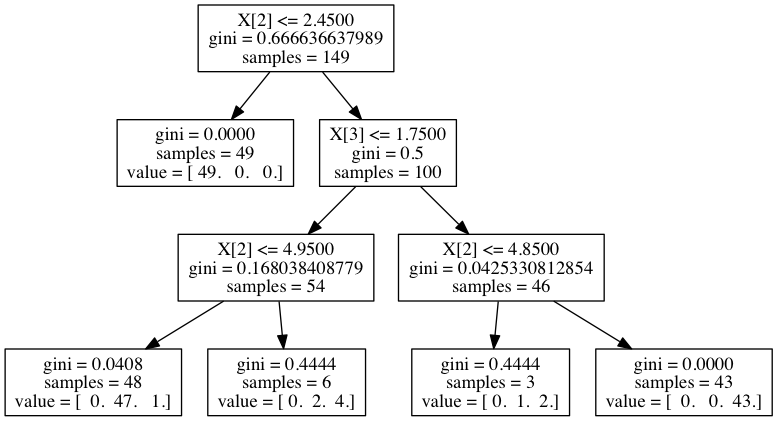

Zwróć uwagę, jak klasyfikator zadaje pytania Tak / Nie dotyczące danych - na przykład czy dana cecha jest <= 1,75 - aby mógł rozróżniać rekordy. To jest istota każdego drzewa decyzyjnego.

Zaletą klasyfikatorów drzew decyzyjnych jest to, że są one **niezmienne w skali (scale invariant)**, tj. skala cechy nie wpływa na ich skuteczność, w przeciwieństwie do wielu modeli uczenia maszynowego. Innymi słowy, nie ma znaczenia, czy zakres naszych funkcji wynosi od 0 do 1, czy od 0 do 1000; Klasyfikatory drzew decyzyjnych będą z nimi działać tak samo.

Istnieje kilka parametrów (tzw. hiperparametrów), które możemy dostroić pod kątem klasyfikatorów drzew decyzyjnych, ale na razie użyjmy podstawowego klasyfikatora drzewa decyzyjnego.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create the classifier
decision_tree_classifier = DecisionTreeClassifier()

# Train the classifier on the training set
decision_tree_classifier.fit(training_inputs, training_classes)

# Validate the classifier on the testing set using classification accuracy
decision_tree_classifier.score(testing_inputs, testing_classes)

0.9736842105263158

Nasz model osiąga ponad 97% dokładności klasyfikacji bez większego wysiłku.

Jest jednak pewien haczyk: w zależności od sposobu próbkowania naszego zestawu treningowego i testowego nasz model może osiągnąć od 80% do 100% dokładności:

(array([  2.,   7.,  12.,   0.,  77., 214.,   0., 336., 278.,  74.]),
 array([0.81578947, 0.83421053, 0.85263158, 0.87105263, 0.88947368,
        0.90789474, 0.92631579, 0.94473684, 0.96315789, 0.98157895,
        1.        ]),
 <a list of 10 Patch objects>)

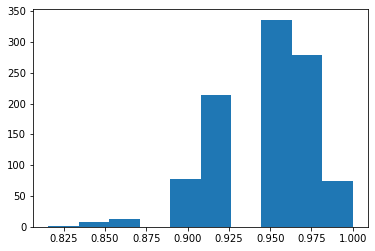

In [ ]:
model_accuracies = []

for repetition in range(1000):


    #Dzielimy Dataset
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25)
    
    #Uczymy model
    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)
    
    #I tak 1000 razy

plt.hist(model_accuracies, bins=10)

Jest to oczywiście problem polegający na tym, że nasz model działa zupełnie inaczej w zależności od podzbioru danych, na których jest trenowany. Zjawisko to jest znane jako overfitting: model uczy się klasyfikować zbiór uczący tak dobrze, że nie generalizuje i nie działa dobrze na danych, których wcześniej nie widział.

**Walidacja krzyżowa (k-fold Cross-validation)**

Ten problem jest głównym powodem, dla którego większość analityków danych przeprowadza k-krotną weryfikację krzyżową swoich modeli wg schematu: podziel oryginalny zbiór danych na k podzbiorów, użyj jednego z podzbiorów jako zestawu testowego, a pozostałe podzbiory są używane jako zestaw treningowy. Ten proces jest następnie powtarzany k razy tak, że każdy podzbiór jest używany jako zestaw testowy dokładnie raz.

10-krotna weryfikacja krzyżowa jest najczęstszym wyborem, więc użyjmy tego tutaj. Wykonywanie 10-krotnej weryfikacji krzyżowej na naszym zestawie danych wygląda mniej więcej tak:

(każdy kwadrat jest wpisem w naszym zestawie danych)

TypeError: ignored

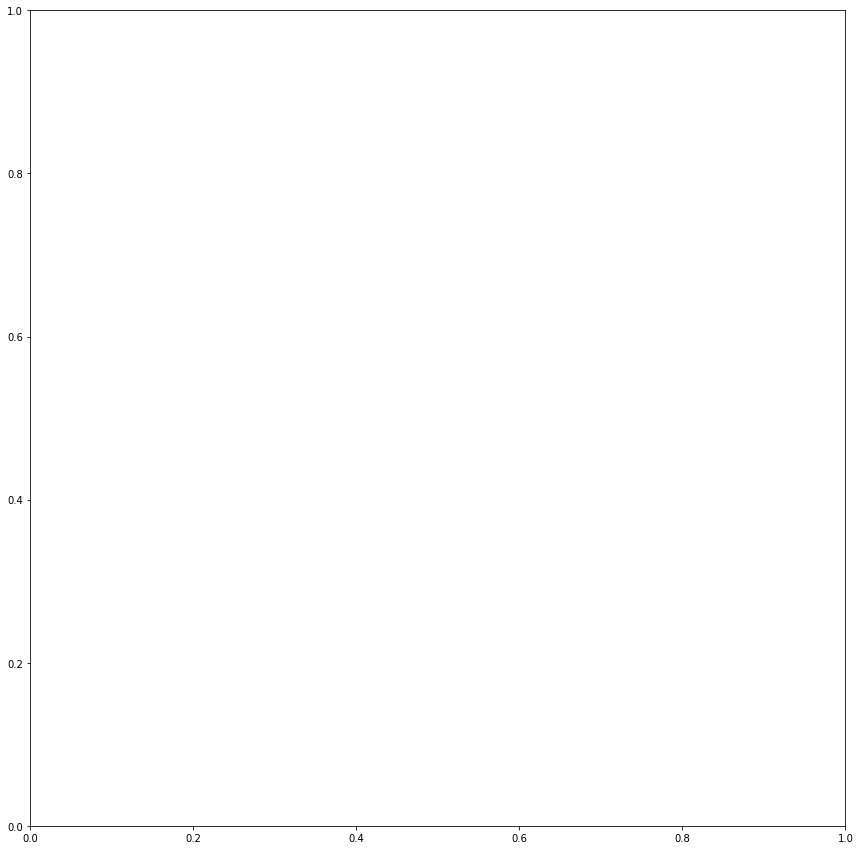

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

def plot_cv(cv, features, labels):
    masks = []
    for train, test in cv.split(features, labels):
        mask = np.zeros(len(labels), dtype= str)
        mask[test] = 1
        masks.append(mask)
    
    plt.figure(figsize=(15, 15))
    plt.imshow(masks, interpolation='none', cmap='gray_r')
    plt.ylabel('Fold')
    plt.xlabel('Row #')

plot_cv(StratifiedKFold(n_splits=10), all_inputs, all_labels)

W powyższym kodzie użyliśmy weryfikacji krzyżowej **Stratified k-fold**. Stratyfikowany k-fold utrzymuje te same proporcje klas we wszystkich podzbiorach, co jest niezbędne do zachowania reprezentatywnego podzbioru naszego zbioru danych. (np. abyśmy nie mieli 100% Iris setosa w jednej z grup).

Możemy przeprowadzić 10-krotną weryfikację krzyżową naszego modelu za pomocą następującego kodu:

Scores: [1.         0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.93333333 0.93333333 1.         1.        ]


Text(0.5, 1.0, 'Average score: 0.953')

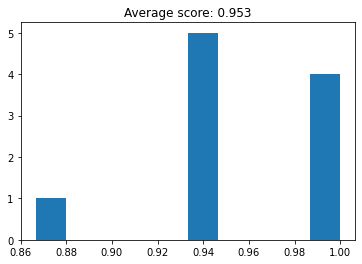

In [ ]:
from sklearn.model_selection import cross_val_score

decision_tree_classifier = DecisionTreeClassifier()

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)
print('Scores: %s' % cv_scores)
plt.hist(cv_scores)
plt.title('Average score: {:.3f}'.format(np.mean(cv_scores)))

#**Krok 7: Dopracuj swój model. Strojenie hiperparametrów**

Każdy model uczenia maszynowego zawiera różne parametry do dostrojenia, a te parametry mogą mieć kluczowe znaczenie dla wydajności naszego klasyfikatora. Na przykład, jeśli poważnie ograniczymy głębokość naszego klasyfikatora drzewa decyzyjnego:

Text(0.5, 1.0, 'Average score: 0.664')

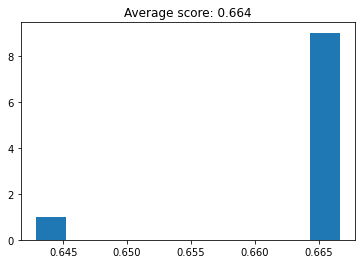

In [ ]:
decision_tree_classifier = DecisionTreeClassifier(max_depth=1)

cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {:.3f}'.format(np.mean(cv_scores)))


dokładność klasyfikacji ogromnie spada.

Dlatego musimy znaleźć systematyczną metodę odkrywania najlepszych hiperparametrów dla naszego modelu i zbioru danych (**Hiperparameter optimization**).

Najpopularniejszą metodą dostrajania hiperparametrów modelu jest wyszukiwanie siatki. Idea wyszukiwania siatki (**Grid Search**) jest prosta: zbadaj szereg parametrów i znajdź najlepszą kombinację parametrów. Skoncentruj swoje wyszukiwanie na najlepszym zakresie parametrów, a następnie powtórz ten proces kilka razy, aż zostaną znalezione najlepsze parametry.

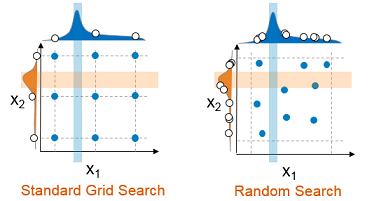

Dostrójmy nasz klasyfikator drzewa decyzyjnego. Na razie będziemy trzymać się tylko dwóch parametrów, ale jeśli chcemy, możemy jednocześnie badać dziesiątki hiperparametrów.

Wybrane hiperparametry to:

**max_depth: int, default=None**

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.


**max_featuresint, float or {“auto”, “sqrt”, “log2”}, default=None**

The number of features to consider when looking for the best split.

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [ ]:
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.96
Best parameters: {'max_depth': 3, 'max_features': 2}


Teraz zwizualizujmy wyniki:

Text(33.0, 0.5, 'max_depth')

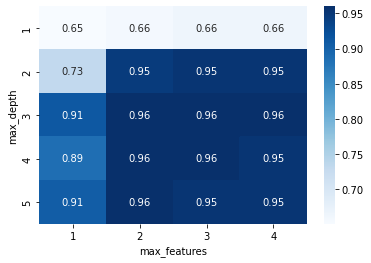

In [ ]:
grid_visualization = grid_search.cv_results_['mean_test_score']
grid_visualization.shape = (5, 4)
sb.heatmap(grid_visualization, cmap='Blues', annot=True)
plt.xticks(np.arange(4) + 0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(5) + 0.5, grid_search.param_grid['max_depth'])
plt.xlabel('max_features')
plt.ylabel('max_depth')

Teraz mamy lepsze pojęcie o przestrzeni parametrów: wiemy, że potrzebujemy *max_depth* co najmniej 2, aby drzewo decyzyjne mogło podjąć więcej niż jednorazową decyzję.

Wydaje się, że *max_features* nie robi tutaj dużej różnicy, o ile mamy 2 z nich, co ma sens, ponieważ nasz zestaw danych ma tylko 4 funkcje i jest stosunkowo łatwy do sklasyfikowania. (Pamiętaj, że jedną z klas naszego zbioru danych można było łatwo oddzielić od reszty na podstawie jednej funkcji).

Przejdźmy dalej i użyjmy szerokiego wyszukiwania w siatce, aby znaleźć najlepsze ustawienia dla kilku hiperparametrów.

Dodatkowe hiperparametry to:

**criterion{“gini”, “entropy”}, default=”gini”**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**splitter{“best”, “random”}, default=”best”**

The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.


In [ ]:
decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.9733333333333334
Best parameters: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 3, 'splitter': 'random'}


Teraz możemy wybrać najlepszy klasyfikator z wyszukiwania siatki i użyć go:

In [ ]:
decision_tree_classifier = grid_search.best_estimator_
decision_tree_classifier

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=3,
                       splitter='random')

Możemy zwizualizować utworzone drzewo decyzyjne za pomocą funkcji GraphViz, aby zobaczyć, jak wykonuje klasyfikacje:

In [ ]:
#Instalacja wymaganych komponentów
!pip install graphviz

In [ ]:
#Instalacja wymaganych komponentów cd...
!pip install pydotplus

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
feature_cols = ['sepal_length_cm', 'sepal_width_cm','petal_length_cm', 'petal_width_cm']
class_names = ['Iris-setosa','Iris-versicolor','Iris-virginica']

dot_data = StringIO()
export_graphviz(decision_tree_classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=class_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('iris_tree.png')
Image(graph.create_png())

ModuleNotFoundError: ignored

#**Krok 8: Zaprezentuj swoje rozwiązanie**
W końcu mamy nasz klasyfikator. Stwórzmy kilka wizualizacji jego działania, abyśmy mieli coś do pokazania szefowi danych naszej firmy.

[1.         0.86666667 1.         1.         0.86666667 0.73333333
 0.73333333 1.         0.93333333 1.        ]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


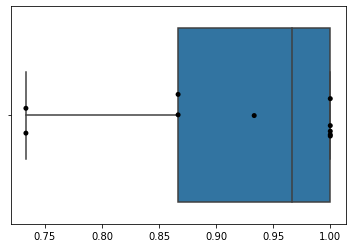

In [ ]:
dt_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)
print(dt_scores)
sb.boxplot(dt_scores)
sb.stripplot(dt_scores, jitter=True, color='black')

A może porównamy inny klasyfikator, aby zobaczyć, jak działają?

#**Losowy las decyzyjny (Random Forest, Random Decision Forest)**

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Lasy losowe zwykle działają lepiej niż indywidualne drzewa decyzyjne. Powszechnym problemem, z którym borykają się drzewa decyzyjne, jest skłonność do nadmiernego dopasowania: komplikują się do tego stopnia, że ​​klasyfikują zbiór uczący niemal idealnie, ale nie generalizują danych, których wcześniej nie widziały.

Losowe klasyfikatory leśne omijają to ograniczenie, tworząc całą grupę drzew decyzyjnych (stąd „las”) - każdy z nich jest szkolony na losowych podzbiorach próbek szkoleniowych (narysowanych z zastąpieniem) i cech (narysowanych bez zastępowania) - i  te drzewa współpracują razem aby dokonać dokładniejszej klasyfikacji. Podejście takie należy do tzw. **Metod zespołowych (Ensemble learning)** 

Zobaczmy, czy klasyfikator Random Forest działa tutaj lepiej.

Cechą scikit-learn jest to, że proces uczenia, testowania, dostrajania parametrów itp. jest taki sam dla wszystkich modeli, więc musimy tylko podłączyć nowy klasyfikator.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier()

parameter_grid = {'n_estimators': [10, 25, 50, 100],
                  'criterion': ['gini', 'entropy'],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(random_forest_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

grid_search.best_estimator_

Best score: 0.9666666666666666
Best parameters: {'criterion': 'gini', 'max_features': 4, 'n_estimators': 50}


RandomForestClassifier(max_features=4, n_estimators=50)

Teraz możemy porównać oba wyuczone modele:

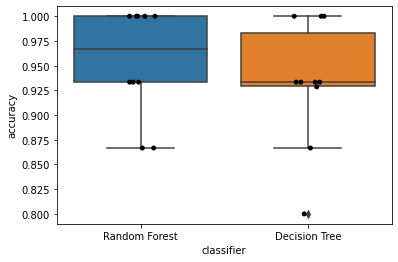

In [ ]:
random_forest_classifier = grid_search.best_estimator_

rf_df = pd.DataFrame({'accuracy': cross_val_score(random_forest_classifier, all_inputs, all_labels, cv=10),
                       'classifier': ['Random Forest'] * 10})
dt_df = pd.DataFrame({'accuracy': cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10),
                      'classifier': ['Decision Tree'] * 10})
both_df = rf_df.append(dt_df)

sb.boxplot(x='classifier', y='accuracy', data=both_df)
sb.stripplot(x='classifier', y='accuracy', data=both_df, jitter=True, color='black')

Oba modele wydają się działać mniej więcej tak samo na tym zbiorze danych. Dzieje się tak prawdopodobnie z powodu ograniczeń naszego zbioru danych: mamy tylko 4 funkcje do dokonania klasyfikacji, a klasyfikatory Random Forest wyróżniają się, gdy istnieją setki możliwych funkcji do obejrzenia. Innymi słowy, nie było wiele możliwości na ulepszenie w przypadku tego zestawu danych.

**Odtwarzalność**

Zapewnienie powtarzalności naszej pracy jest ostatnim i prawdopodobnie najważniejszym krokiem w każdej analizie. Z reguły nie powinniśmy przykładać wagi do odkrycia, którego nie można odtworzyć. W związku z tym, jeśli nasza analiza nie jest powtarzalna, równie dobrze moglibyśmy tego nie zrobić.

Notebooki takie jak ten znacznie przyczyniają się do powtarzalności naszej pracy. Ponieważ dokumentowaliśmy każdy krok, mamy pisemny zapis tego, co zrobiliśmy i dlaczego to zrobiliśmy - zarówno w postaci tekstu, jak i kodu.

Na koniec wyodrębnijmy główne elementy naszej pracy i zamieńmy je w pojedynczy potok.

[6.  2.8 5.1 1.6]	-->	Iris-virginica	(Actual: Iris-versicolor)
[5.6 2.5 3.9 1.1]	-->	Iris-versicolor	(Actual: Iris-versicolor)
[6.8 3.  5.5 2.1]	-->	Iris-virginica	(Actual: Iris-virginica)
[7.7 2.6 6.9 2.3]	-->	Iris-virginica	(Actual: Iris-virginica)
[5.1 3.4 1.5 0.2]	-->	Iris-setosa	(Actual: Iris-setosa)
[4.9 3.  1.4 0.2]	-->	Iris-setosa	(Actual: Iris-setosa)
[4.6 3.4 1.4 0.3]	-->	Iris-setosa	(Actual: Iris-setosa)
[4.4 3.2 1.3 0.2]	-->	Iris-setosa	(Actual: Iris-setosa)
[6.4 3.2 5.3 2.3]	-->	Iris-virginica	(Actual: Iris-virginica)
[6.7 3.3 5.7 2.1]	-->	Iris-virginica	(Actual: Iris-virginica)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


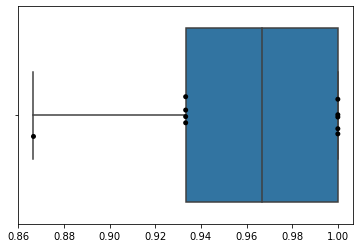

In [ ]:
 %matplotlib inline
import pandas as pd
import seaborn as sb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score

# We can jump directly to working with the clean data because we saved our cleaned data set
iris_data_clean = pd.read_csv('iris-data-clean.csv')

# Testing our data: Our analysis will stop here if any of these assertions are wrong

# We know that we should only have three classes
assert len(iris_data_clean['class'].unique()) == 3

# We know that sepal lengths for 'Iris-versicolor' should never be below 2.5 cm
assert iris_data_clean.loc[iris_data_clean['class'] == 'Iris-versicolor', 'sepal_length_cm'].min() >= 2.5

# We know that our data set should have no missing measurements
assert len(iris_data_clean.loc[(iris_data_clean['sepal_length_cm'].isnull()) |
                               (iris_data_clean['sepal_width_cm'].isnull()) |
                               (iris_data_clean['petal_length_cm'].isnull()) |
                               (iris_data_clean['petal_width_cm'].isnull())]) == 0

all_inputs = iris_data_clean[['sepal_length_cm', 'sepal_width_cm',
                             'petal_length_cm', 'petal_width_cm']].values

all_labels = iris_data_clean['class'].values

# This is the classifier that came out of Grid Search
random_forest_classifier = RandomForestClassifier(criterion='gini', max_features=2, n_estimators=25)

# All that's left to do now is plot the cross-validation scores
rf_classifier_scores = cross_val_score(random_forest_classifier, all_inputs, all_labels, cv=10)
sb.boxplot(rf_classifier_scores)
sb.stripplot(rf_classifier_scores, jitter=True, color='black')

# ...and show some of the predictions from the classifier
(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25)

random_forest_classifier.fit(training_inputs, training_classes)

for input_features, prediction, actual in zip(testing_inputs[:10],
                                              random_forest_classifier.predict(testing_inputs[:10]),
                                              testing_classes[:10]):
    print('{}\t-->\t{}\t(Actual: {})'.format(input_features, prediction, actual))

Mamy kompletny i powtarzalny proces uczenia maszynowego, który można przedstawić szefowi działu danych naszej firmy.

Spełniliśmy kryteria sukcesu, które ustaliliśmy od początku (dokładność> 90%), a nasz potok jest wystarczająco elastyczny, aby obsługiwać nowe dane wejściowe.

#**Krok 8. Uruchom, monitoruj i utrzymuj swój system**